In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
y = pd.read_csv('/content/drive/MyDrive/מיני פרוייקט לוקמיה/y_data.csv', delimiter='\t')

train = pd.read_csv('/content/drive/MyDrive/מיני פרוייקט לוקמיה/דאטא 1 מתוקן.xlsx - data_set_ALL_AML_train.csv')

test = pd.read_csv('/content/drive/MyDrive/מיני פרוייקט לוקמיה/דאטא 2 מתוקן - data_set_ALL_AML_independent.csv')

מפרידה את העמודות לשני עמודות עם כותרות שיקל בזיהוי

In [5]:
# הצגת הנתונים לפני הפיצול
print("Data before splitting:")
print(y.head())

Data before splitting:
  patient,cancer
0          1,ALL
1          2,ALL
2          3,ALL
3          4,ALL
4          5,ALL


In [6]:
import pandas as pd

# פיצול עמודת 'patient,cancer' לשתי עמודות נפרדות
if 'patient,cancer' in y.columns:
    y[['patient', 'cancer']] = y['patient,cancer'].str.split(',', expand=True)
    y = y.drop('patient,cancer', axis=1)

# הצגת הנתונים לאחר הפיצול
print("\nData after splitting:")
print(y.head())

# הצגת שמות העמודות של y
print("\nColumns of y:")
print(y.columns)




Data after splitting:
  patient cancer
0       1    ALL
1       2    ALL
2       3    ALL
3       4    ALL
4       5    ALL

Columns of y:
Index(['patient', 'cancer'], dtype='object')


מדפיסה לראות את הכותרות של העמודות בכל קובץ

In [7]:
print("y columns:", y.columns)
print("train columns:", train.columns)
print("test columns:", test.columns)

y columns: Index(['patient', 'cancer'], dtype='object')
train columns: Index(['Gene Description', 'Gene Accession Number', '1', '2', '3', '4', '5',
       '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '34', '35',
       '36', '37', '38', '28', '29', '30', '31', '32', '33'],
      dtype='object')
test columns: Index(['Gene Description', 'Gene Accession Number', '39', '40', '42', '47',
       '48', '49', '41', '43', '44', '45', '46', '70', '71', '72', '68', '69',
       '67', '55', '56', '59', '52', '53', '51', '50', '54', '57', '58', '60',
       '61', '65', '66', '63', '64', '62'],
      dtype='object')


Exploratory Data Analysis (EDA):

נבדוק כמה חולי AML וכמה חולי ALL יש לנו בדאטא

In [8]:
print(y.columns)


Index(['patient', 'cancer'], dtype='object')


In [9]:
print(y['cancer'].value_counts())


cancer
ALL    47
AML    25
Name: count, dtype: int64


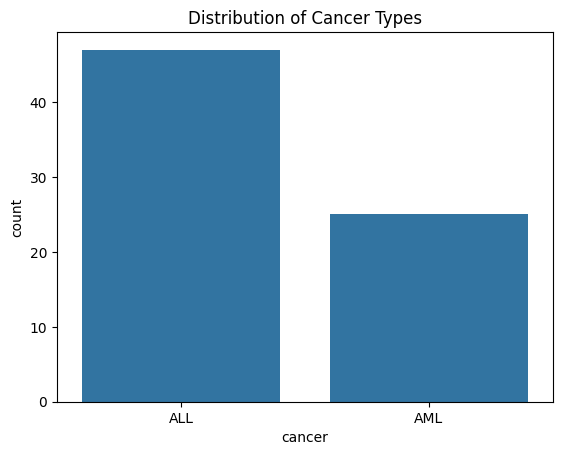

In [10]:
# EDA for Cancer Mapping
sns.countplot(data=y, x='cancer')
plt.title('Distribution of Cancer Types')
plt.show()


נעביר את הערכים לערכים נומרים בy

In [11]:
# Recode label to numeric
y = y.replace({'ALL':0,'AML':1})
labels = ['ALL', 'AML']

עכשיו נעבור לנתונים של החולים

In [12]:
print(train.shape)
print(test.shape)

(7129, 40)
(7129, 36)


השמות של העמודות לא בסדר מספרי, נסדר אותם

In [13]:
train_columns_titles = ['Gene Description', 'Gene Accession Number', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38']

train =train.reindex(columns=train_columns_titles)

In [14]:
test_columns_titles = ['Gene Description', 'Gene Accession Number','39', '40', '41', '42', '43', '44', '45', '46',
       '47', '48', '49', '50', '51', '52', '53',  '54', '55', '56', '57', '58', '59',
       '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72']

test = test.reindex(columns=test_columns_titles)

נחליף בין השורות לעמודות, כדי שהתכונות יהיו בעמודות וזה יקל עלינו לבצע הורדת מימדים ואימון המודל

In [15]:
X_train = train.T
X_test = test.T
print(X_train.columns)
print(X_train.shape)


RangeIndex(start=0, stop=7129, step=1)
(40, 7129)


נהפוך את השורה השנייה לשמות העמודות ונמחק את הראשונה, אני רואה ששתי השורות פשוט כפיליות אחת של השנייה

In [16]:
# Clean up the column names for training data
X_train.columns = X_train.iloc[1]
# Set column names of X_train to the values in the second row of X_train.

X_train = X_train.drop(["Gene Description", "Gene Accession Number"]).apply(pd.to_numeric)
# Drop columns 'Gene Description' and 'Gene Accession Number' from X_train and convert the remaining columns to numeric.

# Clean up the column names for Testing data
X_test.columns = X_test.iloc[1]
# Set column names of X_test to the values in the second row of X_test.

X_test = X_test.drop(["Gene Description", "Gene Accession Number"]).apply(pd.to_numeric)
# Drop columns 'Gene Description' and 'Gene Accession Number' from X_test and convert the remaining columns to numeric.

print(X_train.shape)
print(X_test.shape)
X_train.head()
# Print the shape of X_train and X_test and display the first few rows of X_train.


(38, 7129)
(34, 7129)


Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


עכשיו נתאים את התוויות של המטפולים לנתונים

In [17]:
print(y)

   patient  cancer
0        1       0
1        2       0
2        3       0
3        4       0
4        5       0
..     ...     ...
67      68       0
68      69       0
69      70       0
70      71       0
71      72       0

[72 rows x 2 columns]


 חלוקת הנתונים לסט אימון וסט בדיקה ואיפוס האינדקסים

In [18]:
"""
Split into train and test (we first need to reset the index as the indexes of two dataframes need to be the same before you combine them).
"""
# Convert 'patient' column to integers
y["patient"] = y["patient"].astype(int)

# Reset index for X_train and y_train
X_train = X_train.reset_index(drop=True)
# Reset the index of X_train dataframe and drop the previous index.

# חלוקה נכונה של הנתונים וה-labels
y_train = y[y.patient <= 38]['cancer'].reset_index(drop=True)


# Subset the labels (y) for the first 38 patients and reset index, dropping the previous index.

# Reset index for X_test and y_test
X_test = X_test.reset_index(drop=True)
# Reset the index of X_test dataframe and drop the previous index.

y_test = y[y.patient > 38]['cancer'].reset_index(drop=True)
# Subset the labels (y) for the patients after the first 38 and reset index, dropping the previous index.


ניתן לראות שהתכונות אינם באותו קנה מידה, וזה יכול להזיק לטסט., ננסה לנרמל את הנתונים

MODELS

MODELS

וד להקמת מודל Gradient Boosting עם כיוונון היפר-פרמטרים והערכת ביצועים:

In [19]:
print(f"Number of samples in X_train_encoded: {X_train.shape[0]}")
print(f"Number of samples in y_train: {y_train.shape[0]}")


Number of samples in X_train_encoded: 38
Number of samples in y_train: 38


In [21]:
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier

# בניית המודל לאחר הסרת החריגים
# בדיקת מספר הדוגמאות כדי לוודא שהתאמתם נכונה
print(f"Number of samples in X_train_clean_final: {X_train.shape[0]}")
print(f"Number of samples in y_train_clean_final: {y_train.shape[0]}")
print(f"Number of samples in X_test_clean_final: {X_test.shape[0]}")
print(f"Number of samples in y_test_clean_final: {y_test.shape[0]}")

# הגדרת המסווג והיפר-פרמטרים לבדיקת GridSearchCV
gbc = GradientBoostingClassifier()
param_grid = {
    'n_estimators': [50, 100, 150],   # מספר העצים ביער
    'learning_rate': [0.01, 0.1, 0.2],  # קצב הלמידה
    'max_depth': [3, 4, 5]  # עומק מרבי של כל עץ
}

# כיוונון היפר-פרמטרים עם GridSearchCV
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', error_score='raise')
grid_search.fit(X_train, y_train)

# קבלת התוצאות הטובות ביותר מה-GridSearchCV
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best parameters found: {best_params}")

# ביצוע Cross-Validation להערכת הביצועים של המודל הטוב ביותר
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores)}")

# אימון המודל הטוב ביותר על כל נתוני האימון
best_model.fit(X_train, y_train)

# ניבוי על נתוני הבדיקה
y_pred = best_model.predict(X_test)

# הערכת ביצועים
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Test Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Number of samples in X_train_clean_final: 38
Number of samples in y_train_clean_final: 38
Number of samples in X_test_clean_final: 34
Number of samples in y_test_clean_final: 34
Best parameters found: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}
Cross-Validation Scores: [0.75       1.         0.875      0.85714286 0.71428571]
Mean CV Accuracy: 0.8392857142857142
Test Accuracy: 0.9117647058823529
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.87      0.93      0.90        14

    accuracy                           0.91        34
   macro avg       0.91      0.91      0.91        34
weighted avg       0.91      0.91      0.91        34



Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

# הגדרת המסווג והיפר-פרמטרים לבדיקת GridSearchCV
rfc = RandomForestClassifier()
param_grid_rf = {
    'n_estimators': [50, 100, 150],   # מספר העצים ביער
    'max_depth': [3, 4, 5, None],     # עומק מרבי של כל עץ
    'min_samples_split': [2, 5, 10],  # מינימום דוגמאות לפיצול צומת
    'min_samples_leaf': [1, 2, 4]     # מינימום דוגמאות לעלה
}

# כיוונון היפר-פרמטרים עם GridSearchCV
grid_search_rf = GridSearchCV(estimator=rfc, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring='accuracy', error_score='raise')
grid_search_rf.fit(X_train, y_train)

# קבלת התוצאות הטובות ביותר מה-GridSearchCV
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

print(f"Best parameters found for Random Forest: {best_params_rf}")

# ביצוע Cross-Validation להערכת הביצועים של המודל הטוב ביותר
cv_scores_rf = cross_val_score(best_model_rf, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores for Random Forest: {cv_scores_rf}")
print(f"Mean CV Accuracy for Random Forest: {np.mean(cv_scores_rf)}")

# אימון המודל הטוב ביותר על כל נתוני האימון
best_model_rf.fit(X_train, y_train)

# ניבוי על נתוני הבדיקה
y_pred_rf = best_model_rf.predict(X_test)

# הערכת ביצועים
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"Test Accuracy for Random Forest: {accuracy_rf}")
print(f"Classification Report for Random Forest:\n{report_rf}")


Best parameters found for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Cross-Validation Scores for Random Forest: [0.875      1.         0.75       0.85714286 1.        ]
Mean CV Accuracy for Random Forest: 0.8964285714285716
Test Accuracy for Random Forest: 0.7647058823529411
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        20
           1       1.00      0.43      0.60        14

    accuracy                           0.76        34
   macro avg       0.86      0.71      0.72        34
weighted avg       0.83      0.76      0.74        34



SMOTE

In [23]:

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# יישום SMOTE לאיזון הנתונים
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# הגדרת המסווג והיפר-פרמטרים לבדיקת GridSearchCV
rfc = RandomForestClassifier()
param_grid_rf = {
    'n_estimators': [50, 100, 150],   # מספר העצים ביער
    'max_depth': [3, 4, 5, None],     # עומק מרבי של כל עץ
    'min_samples_split': [2, 5, 10],  # מינימום דוגמאות לפיצול צומת
    'min_samples_leaf': [1, 2, 4]     # מינימום דוגמאות לעלה
}

# כיוונון היפר-פרמטרים עם GridSearchCV
grid_search_rf = GridSearchCV(estimator=rfc, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring='accuracy', error_score='raise')
grid_search_rf.fit(X_train_balanced, y_train_balanced)

# קבלת התוצאות הטובות ביותר מה-GridSearchCV
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

print(f"Best parameters found for Random Forest with SMOTE: {best_params_rf}")

# ביצוע Cross-Validation להערכת הביצועים של המודל הטוב ביותר
cv_scores_rf = cross_val_score(best_model_rf, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores for Random Forest with SMOTE: {cv_scores_rf}")
print(f"Mean CV Accuracy for Random Forest with SMOTE: {np.mean(cv_scores_rf)}")

# אימון המודל הטוב ביותר על כל נתוני האימון
best_model_rf.fit(X_train_balanced, y_train_balanced)

# ניבוי על נתוני הבדיקה
y_pred_rf = best_model_rf.predict(X_test)

# הערכת ביצועים
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"Test Accuracy for Random Forest with SMOTE: {accuracy_rf}")
print(f"Classification Report for Random Forest with SMOTE:\n{report_rf}")


KeyboardInterrupt: 

SVM

In [24]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# הגדרת המסווג והיפר-פרמטרים לבדיקת GridSearchCV
svc = SVC()
param_grid_svc = {
    'C': [0.1, 1, 10, 100],      # פרמטר הרגולריזציה
    'gamma': [1, 0.1, 0.01, 0.001],  # פרמטר הגרעין
    'kernel': ['rbf', 'linear']   # סוג הגרעין
}

# כיוונון היפר-פרמטרים עם GridSearchCV
grid_search_svc = GridSearchCV(estimator=svc, param_grid=param_grid_svc, cv=5, n_jobs=-1, scoring='accuracy', error_score='raise')
grid_search_svc.fit(X_train, y_train)

# קבלת התוצאות הטובות ביותר מה-GridSearchCV
best_params_svc = grid_search_svc.best_params_
best_model_svc = grid_search_svc.best_estimator_

print(f"Best parameters found for SVM: {best_params_svc}")

# ביצוע Cross-Validation להערכת הביצועים של המודל הטוב ביותר
cv_scores_svc = cross_val_score(best_model_svc, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores for SVM: {cv_scores_svc}")
print(f"Mean CV Accuracy for SVM: {np.mean(cv_scores_svc)}")

# אימון המודל הטוב ביותר על כל נתוני האימון
best_model_svc.fit(X_train, y_train)

# ניבוי על נתוני הבדיקה
y_pred_svc = best_model_svc.predict(X_test)

# הערכת ביצועים
accuracy_svc = accuracy_score(y_test, y_pred_svc)
report_svc = classification_report(y_test, y_pred_svc)

print(f"Test Accuracy for SVM: {accuracy_svc}")
print(f"Classification Report for SVM:\n{report_svc}")


Best parameters found for SVM: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Cross-Validation Scores for SVM: [1.         1.         1.         0.85714286 1.        ]
Mean CV Accuracy for SVM: 0.9714285714285715
Test Accuracy for SVM: 0.9705882352941176
Classification Report for SVM:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.93      1.00      0.97        14

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34

